In [ ]:
import pandas as pd

In [ ]:
from selenium import webdriver
driver = webdriver.Chrome('chromedriver.exe')

import time


driver.get('https://www.instargram.com')


time.sleep(3)


insta_id = '본인의 인스타그램 ID'   
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]

password = '본인의 인스타그램 PW' 
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]

input_id.send_keys(insta_id)
input_pw.send_keys(password)

first = driver.find_element_by_css_selector("#loginForm > div.Igw0E.IwRSH.eGOV_._4EzTm.kEKum > div:nth-child(3)")
first.click()

In [ ]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [ ]:
word = '부산맛집'
url = searching(word)
driver.get(url)

In [ ]:
#첫 게시물 클릭

In [ ]:
def click_first(driver):
    first = driver.find_element_by_css_selector('#react-root > section > main > article > div:nth-child(3) > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0')
    first.click()
    time.sleep(3)
click_first(driver)

In [ ]:
#현재 게시글 정보 가져오는 함수

import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    #  작성 일시, 좋아요 수 , 위치 정보 가져오기
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

In [ ]:
['육질이 너무 좋아서 만족 백퍼센트였던 소장가치#소장가치..#광안리핫플#광안리소장가치 #부산핫플#해운대맛집#센텀맛집#수영맛집#부산맛집#광안리맛집#광안리한우#광안리소고기#남천동맛집#민락동맛집',
 '2021-11-10',
 '',
 '',
 ['#소장가치..',
  '#광안리핫플',
  '#광안리소장가치',
  '#부산핫플',
  '#해운대맛집',
  '#센텀맛집',
  '#수영맛집',
  '#부산맛집',
  '#광안리맛집',
  '#광안리한우',
  '#광안리소고기',
  '#남천동맛집',
  '#민락동맛집']]

In [ ]:
#다음 게시물 검색
def next_page(driver):
    next_page = driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow')
    next_page.click()
    time.sleep(3)
next_page(driver)

In [ ]:
word = "부산맛집"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result1 = [ ]


# 여러 게시글 수집하기
target = 10      
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result1.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)
result1 = pd.DataFrame(result1)
result1


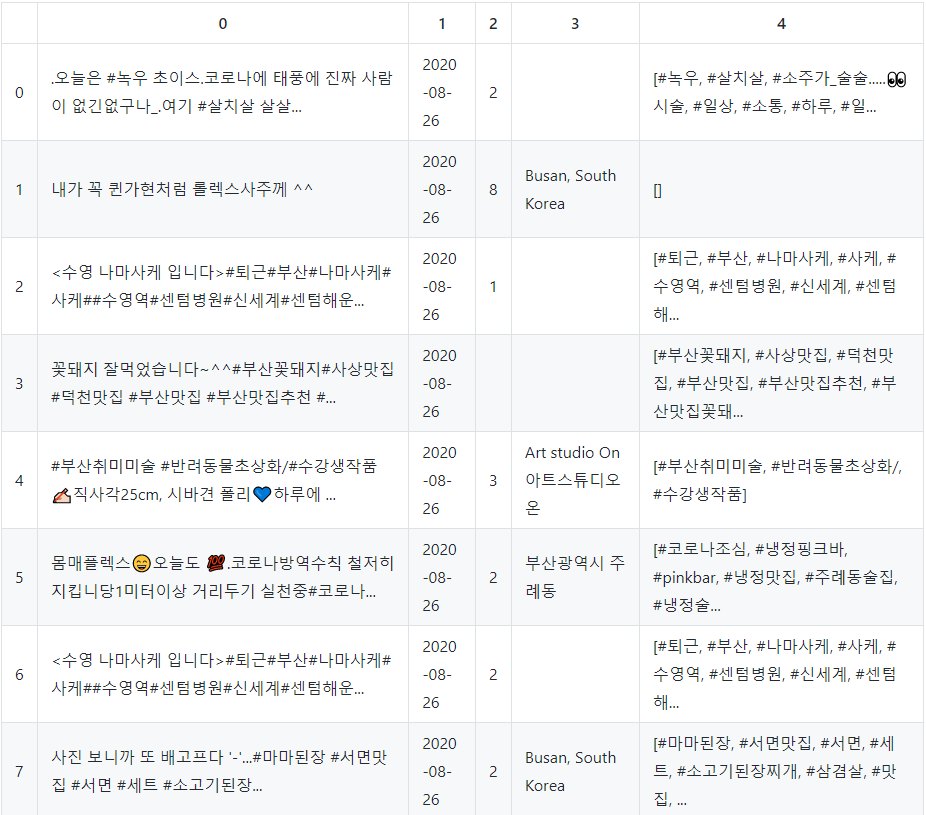

In [ ]:
word = "부산맛집"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result1 = [ ]


# 여러 게시글 수집하기
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result1.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)



# 인스타그램 검색페이지 URL 만들기
word = '부산데이트'
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result2 = [ ]


# 여러 게시글 수집하기
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 2초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result2.append(data)
        next_page(driver)
    except:
        time.sleep(2)
        next_page(driver)    





# 인스타그램 검색페이지 URL 만들기
word = '부산여행'
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result3 = [ ]


# 여러 게시글 수집하기
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 2초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result3.append(data)
        next_page(driver)
    except:
        time.sleep(2)
        next_page(driver)

In [ ]:
df = pd.DataFrame([])
df.append(result1)
df.append(result2)
df=df.append(result3)
df.columns = ['본문','시간','좋아요','위치','해쉬태그']

df.drop_duplicates(subset = ['본문'] , inplace = True)
df=df.reset_index(drop=True)

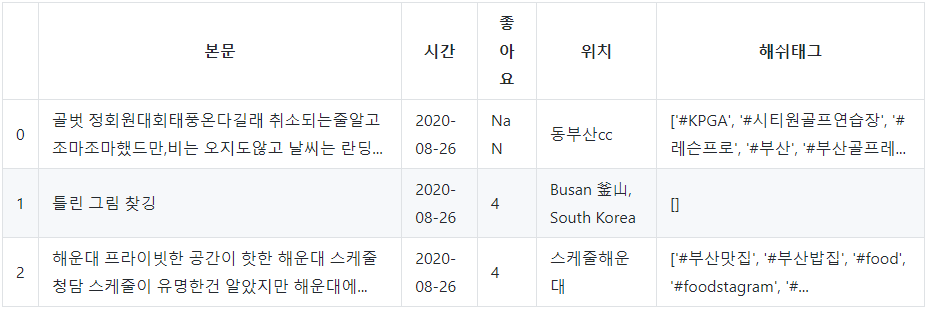

In [ ]:
#해쉬태그의 빈도수 확인

In [ ]:
df['해쉬태그']

In [ ]:
0       ['#KPGA', '#시티원골프연습장', '#레슨프로', '#부산', '#부산골프레...
1                                                      []
2       ['#부산맛집', '#부산밥집', '#food', '#foodstagram', '#...
3         ['#부산맛집', '#신평맛집', '#영진돼지국밥', '#수육백반', '#돼지국밥']
4                                                      []
                              ...                        
2413    ['#해리단하우스', '#부산', '#해운대', '#광...
2414                                                   []
2415                                                   []
2416    ['#제주공항맛집', '#월정리맛집', '#서면맛집', '#강남맛집', '#홍대맛집...
2417    ['#휴무N출사', '#뭉게뭉게구름............', '#감서...
Name: 해쉬태그, Length: 2418, dtype: object

In [ ]:
해쉬태그 = []
for 해쉬 in df['해쉬태그']:
    ex = 해쉬[2:-2].split("', '")
    for 태그 in ex:
        해쉬태그.append(태그)
해쉬태그

In [ ]:
['#KPGA',
 '#시티원골프연습장',
 '#레슨프로',
 '#부산',
 '#부산골프레슨',
 '#부산골프연습장',
 '#대연동골프레슨',
 '#해운대골프레슨',
 '#서면골프레슨',
 '#필드레슨',
 '#개인레슨',
...
 '#semas_youthjob',
 '#동래시장수제가방',
 '#수제가방',
 '#수제천가방',
 '#에코백',
 '#친환경가방',
 '#아기자기한',
 '#동래소품',
 '#동래시장소품',
 '#동래시장유명한곳',
 '#동래시장맛집',
 '#부산',
 ...]

In [ ]:
from collections import Counter
해쉬태그_빈도수 = Counter(해쉬태그)
해쉬태그_빈도수

In [ ]:
Counter({'#KPGA': 1,
         '#시티원골프연습장': 1,
         '#레슨프로': 1,
         '#부산': 222,
         '#부산골프레슨': 1,
         '#부산골프연습장': 1,
         '#대연동골프레슨': 1,
         '#해운대골프레슨': 1,
         '#서면골프레슨': 1,
         '#필드레슨': 1,
         '#개인레슨': 1,
         ...
         '#울산속눈썹': 1,
         '#충장로': 2,
         '#유튜버': 1,
         '#팔로워이벤트': 2,
         '#범계네일': 1,
         '#눈썹반영구': 4,
         '#자연눈썹': 1,
         '#술집홍보': 1,
         '#명인밥상송파구': 1,
         '#한정식맛집': 1,
         '#반찬맛집': 7,
         '#돌솥밥맛집': 1,
         '#순진남_송파맛집': 1,
         ...})

In [ ]:
# 불필요한 해쉬태그를 제거.

stopwords = ['','#부산데이트','#부산여행','#일상', '#선팔', '#부산','#먹스타그램', '#데이트', '#일상','#좋아요','#럽스타그램','#소통', '#맞팔','#부산맛집','#부산술집','#부산카페','#서울대','#교대','#부산호텔','#부산핫플']

해쉬태그_최종 = []
for tag in 해쉬태그:
    if tag not in stopwords:
        if len(tag)<10:
            해쉬태그_최종.append(tag)

해쉬태그_최종 = Counter(해쉬태그_최종)
해쉬태그_최종.most_common(20)

In [ ]:
[('#해운대', 101),
 ('#서면맛집', 86),
 ('#부산', 83),
 ('#해운대맛집', 81),
 ('#광안리', 72),
 ('#부산맛집추천', 71),
 ('#일상', 70),
 ('#서면', 70),
 ('#좋반', 62),
 ('#맛스타그램', 58),
 ('#좋아요반사', 56),
 ('#데이트코스', 56),
 ('#데일리', 55),
 ('#daily', 55),
 ('#busan', 53),
 ('#소통', 47),
 ('#ootd', 47),
 ('#좋아요', 47),
 ('#데이트그램', 47),
 ('#여행', 46)]

In [ ]:
#워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

font_path = "c:/Windows/Fonts/malgun.ttf"

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

busan_mask=np.array(Image.open('busan.png'))
busan_mask

In [ ]:
wc = WordCloud(font_path=font_path,
               background_color="black",
               max_words=150,
               relative_scaling=1,
               mask=busan_mask,
               stopwords=stopwords)
wc = wc.generate_from_frequencies(해쉬태그_최종)
plt.figure(figsize=(30,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis=('off')
plt.show()